# Advanced Chatbot Using RNN, LSTM, BiRNN, and Encoder-Decoder Architectures

This project leverages advanced Recurrent Neural Network (RNN) architectures like LSTM (Long Short-Term Memory), BiRNN (Bidirectional RNN), and Encoder-Decoder networks to build a sophisticated chatbot. These models are well-suited for handling sequential data and are particularly effective for tasks involving natural language processing (NLP), such as chatbot development.

### Key Components of the Project

1. **Recurrent Neural Networks (RNNs)**:
   - RNNs are designed to handle sequential data, which is essential for text processing tasks. They maintain a hidden state that captures information from previous time steps, making them suitable for understanding the context in a conversation.

2. **Long Short-Term Memory (LSTM)**:
   - LSTM is a special type of RNN that overcomes the limitations of vanilla RNNs by addressing the vanishing gradient problem. It is capable of remembering long-term dependencies in the data, which is crucial for understanding longer dialogues and context in conversations.

3. **Bidirectional RNN (BiRNN)**:
   - A BiRNN processes the input data in both forward and backward directions, capturing context from both past and future tokens. This is particularly useful in NLP tasks where context from both sides of a word or sentence is important for accurate predictions.

4. **Encoder-Decoder Architecture**:
   - The Encoder-Decoder model is a popular architecture for sequence-to-sequence tasks, where one sequence (e.g., a user’s input) is mapped to another sequence (e.g., the chatbot’s response). The encoder processes the input sequence and encodes it into a fixed-length context vector, while the decoder generates the output sequence based on this encoded information.

### Benefits of Using These Advanced Architectures

- **Handling Long-Term Dependencies**: LSTM and BiRNNs are particularly effective for remembering long-term dependencies in conversations, which helps the chatbot maintain context across multiple turns.
- **Improved Accuracy**: The encoder-decoder architecture is highly effective in generating meaningful responses in sequence-to-sequence tasks, leading to more coherent and contextually relevant replies.
- **Advanced NLP Capabilities**: By combining these models, the chatbot can handle more complex queries, understand nuanced dialogues, and produce more sophisticated responses.

### Why Use These Models Over Simpler Architectures?

While simpler models like Feedforward Neural Networks and Sequential models (as used in the previous project) can be effective, RNNs, LSTMs, BiRNNs, and Encoder-Decoder architectures are specifically designed to process sequences. They are particularly beneficial for NLP tasks because they can capture the temporal relationships and context inherent in language, leading to a more intelligent and context-aware chatbot.

Here is a breakdown of the code, including descriptions for each section that you can use in a markdown cell:

---

### Importing Required Libraries

This section imports the necessary libraries for building, training, and evaluating the chatbot model.

- `json`: Used to load and parse the dataset (in this case, `intents2.json`) containing the patterns, tags, and responses.
- `numpy`: Essential for numerical operations, such as handling arrays and matrices for data manipulation.
- `train_test_split`: From `sklearn.model_selection`, used for splitting the dataset into training and testing sets.
- `LabelEncoder`: From `sklearn.preprocessing`, used to encode the categorical labels (tags) into numerical values for model training.
- `Tokenizer`: From `tensorflow.keras.preprocessing.text`, used for converting text into a sequence of tokens for the neural network to process.
- `pad_sequences`: From `tensorflow.keras.utils`, used to pad sequences to ensure consistent input size for the model.
- `matplotlib.pyplot`: For plotting graphs, useful for visualizing training progress (e.g., accuracy or loss curves).
- `Sequential`: From `tensorflow.keras.models`, used to define the deep learning model as a linear stack of layers.
- `Embedding`, `LSTM`, `SimpleRNN`, `Dense`, `Bidirectional`: Keras layers used to define the neural network architecture. `Embedding` is for word embeddings, `LSTM` and `SimpleRNN` are types of recurrent neural networks, and `Dense` is used for fully connected layers. `Bidirectional` is used to enhance the LSTM or RNN model by processing data in both forward and backward directions.
- `RepeatVector`: A layer used in sequence-to-sequence models, particularly in encoder-decoder architectures, to repeat the encoded input for decoding.

---

This setup lays the foundation for loading data, processing it, and defining the deep learning model architecture using Keras, which will then be used to build and train a chatbot capable of understanding and responding to user queries.



In [17]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, Dense, Bidirectional  # Add any layers needed
from tensorflow.keras.layers import RepeatVector



---

### Loading and Preprocessing the Dataset

This section loads the intent data from a JSON file and preprocesses it to extract the necessary information for training the chatbot model.

- **Loading the JSON Data**:
  - The code reads the `intents2.json` file using the `json.load()` method to load the contents into a Python dictionary. This file contains various user queries (patterns) mapped to their respective tags and possible responses.
  
- **Preprocessing the Data**:
  - **Extracting Training Sentences and Labels**:
    - A loop iterates through each intent in the dataset. For each intent, its `patterns` (user queries) are added to `training_sentences` and its `tag` (category of the query) is added to `training_labels`. These two lists will be used as input and output for training the chatbot model.
  
  - **Extracting Responses**:
    - Each intent also contains responses. These are collected and added to the `responses` list. This will be used later for generating chatbot replies based on the predicted intent.
  
  - **Storing Unique Labels**:
    - The code ensures that all unique intent tags are stored in the `labels` list, which is important for encoding the labels before model training.

The end result of this preprocessing step is that we have:
- `training_sentences`: A list of user queries (patterns).
- `training_labels`: A list of tags corresponding to each query.
- `responses`: A list of possible responses for each tag.
- `labels`: A list of unique intent tags to help with label encoding.

---

This step prepares the data for the subsequent stages, including tokenization, padding, and encoding, which will be used to train the machine learning model.

In [18]:
# Load the intents data from the JSON file
with open('C:/Users/nisha/Downloads/CHATBOT-20241115T051416Z-001/CHATBOT/intents2.json', encoding='utf-8') as data_file:
    data = json.load(data_file)

# Preprocess the data
training_sentences = []
training_labels = []
labels = []
responses = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])

---

### Label Encoding and Text Tokenization

This section prepares the data for the neural network by encoding the labels (intent tags) and tokenizing the user input sentences.

- **Label Encoding**:
  - **Using `LabelEncoder`**:
    - The `LabelEncoder` from `sklearn.preprocessing` is used to convert the categorical labels (intent tags) into numerical format. The `fit_transform()` function encodes the `training_labels` into numerical values, which are stored in the `labels_encoded` array. This is necessary because machine learning models typically work with numerical data.

- **Text Tokenization**:
  - **Using `Tokenizer`**:
    - The `Tokenizer` from Keras is used to convert the `training_sentences` (user input queries) into sequences of integers. Each word in the training sentences is assigned a unique integer based on its frequency in the corpus. 
    - The `fit_on_texts()` method is used to build the word index, which is a dictionary of words mapped to unique integer indices. 
    - The `vocab_size` is determined by the length of the word index plus one (to account for padding).

  - **Converting Sentences to Sequences**:
    - The `texts_to_sequences()` method is used to convert the `training_sentences` into sequences of integers based on the word index.

- **Padding the Sequences**:
  - **Ensuring Uniform Sequence Length**:
    - Since input sequences for neural networks need to have a consistent length, the `pad_sequences()` function from Keras is used to ensure that all sequences are padded to the maximum sequence length (`max_len`).
    - The padding is added at the end of the sequences (`padding='post'`), ensuring that the input to the model is of uniform length.

The result of this step is:
- `labels_encoded`: A numerical representation of the intent tags.
- `X`: A padded sequence of integers representing the tokenized sentences, ready to be used as input for training the model.

---

This step prepares the data for model training by converting the text data into numerical format and ensuring that the input sequences have a consistent length for the neural network.

In [19]:
# Encode the labels (intent tags) using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(training_labels)

# Tokenize the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(training_sentences)
vocab_size = len(tokenizer.word_index) + 1
X = tokenizer.texts_to_sequences(training_sentences)

# Pad sequences to ensure uniform length
max_len = max([len(seq) for seq in X])  # maximum sequence length
X = pad_sequences(X, padding='post', maxlen=max_len)

---

### Splitting Data into Training and Test Sets

This step involves splitting the prepared data (`X` for sentences and `labels_encoded` for intent tags) into training and test datasets.

- **`train_test_split()`**:
  - The `train_test_split()` function from `sklearn.model_selection` is used to randomly divide the data into training and testing sets. This is essential for evaluating the model’s performance on unseen data, ensuring that it generalizes well rather than just memorizing the training data.
  
  - **Arguments**:
    - `X`: The input data (tokenized and padded sentences).
    - `labels_encoded`: The corresponding labels (numerical intent tags).
    - `test_size=0.2`: This indicates that 20% of the data will be used for testing, and the remaining 80% will be used for training.
    - `random_state=42`: This sets a fixed random seed for reproducibility. Using the same `random_state` ensures that the split will be the same each time the code is run, which is important for consistency in experiments.

- **Output**:
  - `X_train`, `y_train`: The training data (input sentences and corresponding intent labels).
  - `X_test`, `y_test`: The test data (input sentences and corresponding intent labels), which will be used to evaluate the performance of the trained model.

---

This step ensures that the model is trained on one portion of the data (`X_train` and `y_train`) and evaluated on a separate, unseen portion (`X_test` and `y_test`), helping prevent overfitting and giving a better estimate of the model’s real-world performance.

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels_encoded, test_size=0.2, random_state=42)

---

### Model Definitions: LSTM, RNN, Bidirectional RNN (BRNN), and Encoder-Decoder

In this section, we define four distinct models for text classification, each utilizing a different architecture. These models include **LSTM (Long Short-Term Memory)**, **RNN (Recurrent Neural Network)**, **Bidirectional RNN (BRNN)**, and **Encoder-Decoder**. All models are built using the Keras Sequential API and are designed for intent classification from text input. Below is a detailed explanation of each model's components, their values, and their significance in sequence processing tasks:

#### 1. **LSTM (Long Short-Term Memory) Model**:
   - **Purpose**: LSTM is a type of recurrent neural network (RNN) designed to handle sequences where long-term dependencies exist. It is capable of learning and remembering information for long periods, making it suitable for tasks where context from earlier in the sequence is important, such as in natural language processing (NLP).
   - **Architecture**:
     - **Embedding Layer**:
       - The `Embedding` layer transforms integer-encoded words into dense vectors of fixed size. Here, we set the vocabulary size (`vocab_size`) and the dimensionality of the embeddings (64). The input length (`max_len`) defines the maximum length of sequences to ensure all inputs have the same length.
       - **`vocab_size`** represents the number of unique words in the dataset (i.e., the total words plus one for padding).
       - **`64`** indicates the dimensionality of the word embeddings, meaning each word will be represented by a vector of length 64. Larger values can capture more complex relationships but increase computational cost.
       - **`max_len`** is the maximum sequence length. Any input longer than this is truncated, and shorter inputs are padded.
     - **LSTM Layer**:
       - The `LSTM(64, activation='tanh', return_sequences=False)` layer is the core of the LSTM model. It uses 64 units to process the input sequence and apply the `tanh` activation function. The `return_sequences=False` ensures that only the final output is passed to the next layer, which is appropriate for classification tasks where the sequence is summarized into a single output.
     - **Dense Layers**:
       - A fully connected `Dense(16, activation='relu')` layer with 16 units and ReLU activation is added to introduce non-linearity into the network. This helps the model to learn more complex patterns.
     - **Output Layer**:
       - The final `Dense(len(labels), activation='softmax')` layer predicts the class for each input sequence. The number of units in this layer corresponds to the number of unique classes (`len(labels)`), with softmax activation ensuring the output values represent class probabilities.
   - **Loss and Optimizer**:
     - **Loss Function**: `sparse_categorical_crossentropy` is used because the task is a multi-class classification problem, where each sequence corresponds to one class (intent).
     - **Optimizer**: Adam optimizer is chosen for its efficiency in training deep learning models by adapting the learning rate based on the gradients.

#### 2. **RNN (Recurrent Neural Network) Model**:
   - **Purpose**: The RNN model processes sequential data by maintaining a hidden state across time steps. However, unlike LSTMs, RNNs struggle with long-term dependencies due to vanishing gradient problems, making them more suited for tasks with short-term dependencies or simpler sequence relationships.
   - **Architecture**:
     - **Embedding Layer**:
       - The `Embedding` layer works as described in the LSTM model, transforming word indices into dense word embeddings.
     - **RNN Layer**:
       - `SimpleRNN(64, activation='tanh', return_sequences=False)` defines an RNN with 64 units and `tanh` activation. This simple RNN processes the sequence step by step and updates its internal state. Like the LSTM model, `return_sequences=False` means that only the final output is passed to the next layer.
     - **Dense Layers**:
       - The same fully connected dense layer with ReLU activation is used to add complexity and allow the model to learn non-linear relationships.
     - **Output Layer**:
       - The output layer is the same as the LSTM model and uses a softmax activation to predict the intent class for each sequence.
   - **Loss and Optimizer**:
     - **Loss Function** and **Optimizer**: Same as the LSTM model, using sparse categorical cross-entropy and Adam optimizer.

#### 3. **Bidirectional RNN (BRNN) Model**:
   - **Purpose**: Bidirectional RNNs process the input sequence in both directions: from past to future (forward) and future to past (backward). This allows the model to capture context from both sides of the sequence, making it especially useful when both past and future information are important for understanding the sequence.
   - **Architecture**:
     - **Embedding Layer**: Same as the previous models.
     - **Bidirectional RNN Layer**:
       - `Bidirectional(LSTM(64, activation='tanh'))` applies LSTM units in both forward and backward directions. This bidirectional architecture allows the model to use both past and future context for each time step, potentially improving performance over unidirectional models.
     - **Dense Layers**:
       - A `Dense(16, activation='relu')` layer is included to capture complex patterns in the data.
     - **Output Layer**:
       - The output layer is the same as the LSTM model, using softmax activation to predict the intent class.
   - **Loss and Optimizer**:
     - **Loss Function** and **Optimizer**: Same as the LSTM model, using sparse categorical cross-entropy and Adam optimizer.

#### 4. **Encoder-Decoder Model**:
   - **Purpose**: The Encoder-Decoder architecture is typically used in sequence-to-sequence tasks, where the input and output sequences have different lengths. The encoder processes the input sequence into a context vector (a fixed-size summary), and the decoder generates the output sequence from this context. This model is useful when the input sequence should be transformed into an output class or another sequence.
   - **Architecture**:
     - **Encoder Part**:
       - The encoder is an `LSTM` layer that processes the input sequence. It outputs a context vector that summarizes the information of the entire sequence.
     - **RepeatVector**:
       - `RepeatVector(max_len)` repeats the context vector for each time step in the sequence, effectively preparing it for the decoder.
     - **Decoder Part**:
       - The decoder is another `LSTM` layer, which processes the repeated context vector and generates the output.
     - **Dense Layer**:
       - A fully connected layer is used for the output, predicting the intent class for each input sequence.
   - **Loss and Optimizer**:
     - **Loss Function** and **Optimizer**: Same as the previous models, using sparse categorical cross-entropy and Adam optimizer.

---

### Summary of Key Values and Model Architecture:

- **`vocab_size`**: This represents the total number of unique words in the dataset. It is crucial for the embedding layer to know how many distinct words exist in the text data. We add `1` to account for padding.
  
- **`64`**: This value indicates the dimensionality of the word embeddings and the number of units in the LSTM, RNN, and other recurrent layers. A larger value can capture more complex relationships within the data but requires more computational resources.

- **`max_len`**: The maximum sequence length, which determines how long each input sequence should be. Sequences longer than `max_len` will be truncated, and shorter ones will be padded. This ensures that all input data has the same shape, which is necessary for training.

- **`len(labels)`**: The number of unique intent classes (tags) in the dataset. This determines the number of neurons in the output layer, where each neuron corresponds to a class.

These models aim to compare different architectures for sequence classification tasks, and each one brings unique strengths. The LSTM model is well-suited for longer sequences with complex relationships, while the RNN is more basic and works well for simpler problems. The Bidirectional RNN improves performance by processing sequences in both directions, and the Encoder-Decoder architecture is used for sequence transformation tasks.

---

In [30]:
# Define the models as functions (LSTM, RNN, BRNN, Encoder-Decoder)
def build_lstm_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 64, input_length=max_len))
    model.add(LSTM(64, activation='tanh', return_sequences=False))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(len(labels), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model


def build_rnn_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 64, input_length=max_len))
    model.add(SimpleRNN(64, activation='tanh', return_sequences=False))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(len(labels), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

def build_brnn_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 64, input_length=max_len))
    model.add(Bidirectional(LSTM(64, activation='tanh')))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(len(labels), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model


def build_encoder_decoder_model():
    model = Sequential()
    
    # Encoder part (LSTM)
    model.add(Embedding(vocab_size, 64, input_length=max_len))
    model.add(LSTM(64, activation='tanh', return_sequences=False))  # Encoder LSTM
    
    # Decoder part (RepeatVector and LSTM)
    model.add(RepeatVector(max_len))  # Repeat vector for decoder
    model.add(LSTM(64, activation='tanh', return_sequences=False))  # Decoder LSTM
    
    # Output layer (Single output class prediction)
    model.add(Dense(len(labels), activation='softmax'))  # Predict only one class for the entire sequence
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    
    return model

In [6]:
pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Training, Evaluation, and Saving Multiple Models Function

The `train_evaluate_and_save_multiple` function is a higher-level function designed to train, evaluate, and save multiple models at once. It iterates over a list of models, training each one, evaluating its performance on a test set, and saving the trained model to a file. Below is a detailed description of the parameters and the function's operation:

#### Parameters:
- **`models`**: A list of Keras model objects (e.g., LSTM, RNN, BRNN, Encoder-Decoder) that need to be trained and evaluated.
- **`model_names`**: A list of strings, each corresponding to a model name. These names will be used when saving the models to disk and when printing training progress.
- **`X_train`**: The training data (tokenized and padded sentences) that will be used to train each model.
- **`y_train`**: The target labels for the training data (e.g., intent tags).
- **`X_test`**: The test data, used to evaluate each model after training.
- **`y_test`**: The target labels for the test data.
- **`epochs`** (default 500): The number of training epochs for each model. More epochs generally result in better training, but too many can lead to overfitting.
- **`batch_size`** (default 32): The number of samples processed at once during training. Smaller values lead to noisier updates, but potentially faster convergence.

#### Function Steps:
1. **Initialize an Empty Dictionary**:
   - The function creates an empty dictionary (`history_dict`) to store the training history of each model. This history includes the loss and accuracy metrics for both training and validation.

2. **Iterate Through Models**:
   - The function loops over each model in the `models` list and its corresponding name in the `model_names` list, using the `zip()` function to pair each model with its name.
   
3. **Train Each Model**:
   - For each model, it calls the `train_evaluate_and_save` function (described earlier), passing in the current model, its name, training and test data, and the number of epochs and batch size.
   - The function prints the model name for clarity, indicating which model is being trained.

4. **Store History**:
   - After training, the function stores the returned `history` object (which contains the model’s training history) in the `history_dict` under the corresponding model name.

5. **Return History**:
   - Once all models have been trained, evaluated, and saved, the function returns the `history_dict`, which contains the training history for all models. This allows for later analysis or plotting of performance metrics across models.

#### Summary:
This function simplifies the process of training and saving multiple models in one go. It is particularly useful when comparing different types of models (such as LSTM, RNN, BRNN, Encoder-Decoder) on the same task, allowing for easy comparison of performance and ensuring that all models are saved for future use. The `history_dict` returned allows for detailed analysis of how each model performed during training and evaluation.



In [27]:
# Iterate through each model and train, evaluate, and save it
def train_evaluate_and_save_multiple(models, model_names, X_train, y_train, X_test, y_test, epochs=500, batch_size=32):
    history_dict = {}
    for model, name in zip(models, model_names):
        print(f"Training model: {name}")
        
        # Train and save each model
        history = train_evaluate_and_save(model, name, X_train, y_train, X_test, y_test, epochs, batch_size)
        history_dict[name] = history
    
    return history_dict



### Defining, Training, and Saving Multiple Models

This section of the code defines, trains, and saves multiple models, including LSTM, RNN, BRNN, and Encoder-Decoder architectures. Here’s a breakdown of what happens in this part:

#### Steps:
1. **Define Models**:
   - **`models`**: A list is created containing the four models we want to train. Each model is instantiated by calling the respective functions (`build_lstm_model()`, `build_rnn_model()`, `build_brnn_model()`, and `build_encoder_decoder_model()`). These functions return a compiled Keras model.
   - The four models include:
     - **LSTM** (Long Short-Term Memory): A deep learning model designed to handle sequential data with long-range dependencies.
     - **RNN** (Recurrent Neural Network): A simpler recurrent network that also works well for sequential data.
     - **BRNN** (Bidirectional RNN): An extension of RNN, where the network learns from the data in both forward and backward directions.
     - **Encoder-Decoder**: A more complex architecture, typically used for sequence-to-sequence tasks, where an encoder processes input data and a decoder generates output based on the encoded information.

2. **Model Names**:
   - **`model_names`**: A list of strings that correspond to the names of the models, used for printing and saving the models. The names in the list are 'LSTM', 'RNN', 'BRNN', and 'Encoder-Decoder'.

3. **Train, Evaluate, and Save Models**:
   - **`train_evaluate_and_save_multiple()`**: This function is called with the following parameters:
     - **`models`**: The list of models to train.
     - **`model_names`**: The list of model names for saving and identifying each model.
     - **`X_train`, `y_train`**: The training data and labels.
     - **`X_test`, `y_test`**: The test data and labels for evaluating the models.
   - The function trains each model sequentially using the provided training data, evaluates them using the test data, and saves the trained models to disk. It returns a dictionary (`history_dict`) containing the training history for each model. This dictionary allows us to track the performance (loss and accuracy) of each model during training and evaluation.

#### Summary:
This part of the code defines the four models we want to use, trains them, evaluates their performance, and saves them to disk. Each model is handled individually, but all are processed in a loop using the `train_evaluate_and_save_multiple` function, which ensures that the models are trained and saved efficiently. The resulting `history_dict` provides a detailed record of the performance for each model, which can later be used for further analysis or comparison.

In [32]:
# Define models
models = [
    build_lstm_model(),
    build_rnn_model(),
    build_brnn_model(),
    build_encoder_decoder_model()
]

model_names = ['LSTM', 'RNN', 'BRNN', 'Encoder-Decoder']

# Train the models and collec
history_dict = train_evaluate_and_save_multiple(models, model_names, X_train, y_train, X_test, y_test)

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_22 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_23 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_4 (RepeatVector)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training model: LSTM
Training model: LSTM
Epoch 1/500
2/2 - 3s - 1s/step - accuracy: 0.0741 - loss: 2.7056 - val_accuracy: 0.1429 - val_loss: 2.6982
Epoch 2/500
2/2 - 0s - 36ms/step - accuracy: 0.2037 - loss: 2.6976 - val_accuracy: 0.0714 - val_loss: 2.6895
Epoch 3/500
2/2 - 0s - 32ms/step - accuracy: 0.2037 - loss: 2.6878 - val_accuracy: 0.0714 - val_loss: 2.6817
Epoch 4/500
2/2 - 0s - 32ms/step - accuracy: 0.2037 - loss: 2.6785 - val_accuracy: 0.0714 - val_loss: 2.6725
Epoch 5/500
2/2 - 0s - 32ms/step - accuracy: 0.2037 - loss: 2.6677 - val_accuracy: 0.0714 - val_loss: 2.6618
Epoch 6/500
2/2 - 0s - 36ms/step - accuracy: 0.2037 - loss: 2.6538 - val_accuracy: 0.0714 - val_loss: 2.6505
Epoch 7/500
2/2 - 0s - 33ms/step - accuracy: 0.2037 - loss: 2.6390 - val_accuracy: 0.0714 - val_loss: 2.6385
Epoch 8/500
2/2 - 0s - 33ms/step - accuracy: 0.2037 - loss: 2.6218 - val_accuracy: 0.0714 - val_loss: 2.6268
Epoch 9/500
2/2 - 0s - 35ms/step - accuracy: 0.2037 - loss: 2.6010 - val_accuracy: 0.071

Epoch 76/500
2/2 - 0s - 35ms/step - accuracy: 0.6852 - loss: 0.9715 - val_accuracy: 0.1429 - val_loss: 4.3318
Epoch 77/500
2/2 - 0s - 34ms/step - accuracy: 0.7037 - loss: 0.9550 - val_accuracy: 0.1429 - val_loss: 4.3976
Epoch 78/500
2/2 - 0s - 33ms/step - accuracy: 0.6852 - loss: 0.9414 - val_accuracy: 0.1429 - val_loss: 4.3673
Epoch 79/500
2/2 - 0s - 35ms/step - accuracy: 0.6852 - loss: 0.9265 - val_accuracy: 0.1429 - val_loss: 4.4900
Epoch 80/500
2/2 - 0s - 33ms/step - accuracy: 0.7037 - loss: 0.9161 - val_accuracy: 0.1429 - val_loss: 4.4842
Epoch 81/500
2/2 - 0s - 34ms/step - accuracy: 0.7037 - loss: 0.8979 - val_accuracy: 0.1429 - val_loss: 4.6379
Epoch 82/500
2/2 - 0s - 34ms/step - accuracy: 0.7222 - loss: 0.8829 - val_accuracy: 0.1429 - val_loss: 4.7528
Epoch 83/500
2/2 - 0s - 34ms/step - accuracy: 0.7222 - loss: 0.8639 - val_accuracy: 0.1429 - val_loss: 4.5771
Epoch 84/500
2/2 - 0s - 33ms/step - accuracy: 0.7037 - loss: 0.8496 - val_accuracy: 0.1429 - val_loss: 4.7090
Epoch 85/5

2/2 - 0s - 40ms/step - accuracy: 0.8333 - loss: 0.4345 - val_accuracy: 0.0714 - val_loss: 7.5023
Epoch 151/500
2/2 - 0s - 33ms/step - accuracy: 0.8519 - loss: 0.4259 - val_accuracy: 0.0714 - val_loss: 7.4772
Epoch 152/500
2/2 - 0s - 33ms/step - accuracy: 0.8519 - loss: 0.4212 - val_accuracy: 0.0714 - val_loss: 7.4943
Epoch 153/500
2/2 - 0s - 39ms/step - accuracy: 0.8333 - loss: 0.4153 - val_accuracy: 0.0714 - val_loss: 7.5671
Epoch 154/500
2/2 - 0s - 34ms/step - accuracy: 0.8333 - loss: 0.4067 - val_accuracy: 0.0714 - val_loss: 7.6389
Epoch 155/500
2/2 - 0s - 35ms/step - accuracy: 0.8333 - loss: 0.4011 - val_accuracy: 0.0714 - val_loss: 7.6898
Epoch 156/500
2/2 - 0s - 30ms/step - accuracy: 0.8704 - loss: 0.3960 - val_accuracy: 0.0714 - val_loss: 7.7189
Epoch 157/500
2/2 - 0s - 34ms/step - accuracy: 0.8704 - loss: 0.3903 - val_accuracy: 0.0714 - val_loss: 7.7273
Epoch 158/500
2/2 - 0s - 41ms/step - accuracy: 0.8704 - loss: 0.3860 - val_accuracy: 0.0714 - val_loss: 7.7220
Epoch 159/500
2

Epoch 224/500
2/2 - 0s - 32ms/step - accuracy: 0.9259 - loss: 0.2108 - val_accuracy: 0.0714 - val_loss: 9.2606
Epoch 225/500
2/2 - 0s - 34ms/step - accuracy: 0.9259 - loss: 0.2083 - val_accuracy: 0.0714 - val_loss: 9.2802
Epoch 226/500
2/2 - 0s - 41ms/step - accuracy: 0.9259 - loss: 0.2067 - val_accuracy: 0.0714 - val_loss: 9.2832
Epoch 227/500
2/2 - 0s - 32ms/step - accuracy: 0.9259 - loss: 0.2066 - val_accuracy: 0.0714 - val_loss: 9.2994
Epoch 228/500
2/2 - 0s - 33ms/step - accuracy: 0.9259 - loss: 0.2038 - val_accuracy: 0.0714 - val_loss: 9.3333
Epoch 229/500
2/2 - 0s - 40ms/step - accuracy: 0.9259 - loss: 0.2031 - val_accuracy: 0.0714 - val_loss: 9.3463
Epoch 230/500
2/2 - 0s - 34ms/step - accuracy: 0.9259 - loss: 0.2017 - val_accuracy: 0.0714 - val_loss: 9.3529
Epoch 231/500
2/2 - 0s - 37ms/step - accuracy: 0.9259 - loss: 0.2006 - val_accuracy: 0.0714 - val_loss: 9.3829
Epoch 232/500
2/2 - 0s - 34ms/step - accuracy: 0.9259 - loss: 0.1984 - val_accuracy: 0.0714 - val_loss: 9.3974
E

Epoch 298/500
2/2 - 0s - 34ms/step - accuracy: 0.9259 - loss: 0.1501 - val_accuracy: 0.0714 - val_loss: 10.3585
Epoch 299/500
2/2 - 0s - 35ms/step - accuracy: 0.9259 - loss: 0.1498 - val_accuracy: 0.0714 - val_loss: 10.3708
Epoch 300/500
2/2 - 0s - 28ms/step - accuracy: 0.9259 - loss: 0.1489 - val_accuracy: 0.0714 - val_loss: 10.3791
Epoch 301/500
2/2 - 0s - 34ms/step - accuracy: 0.9259 - loss: 0.1482 - val_accuracy: 0.0714 - val_loss: 10.3867
Epoch 302/500
2/2 - 0s - 36ms/step - accuracy: 0.9259 - loss: 0.1486 - val_accuracy: 0.0714 - val_loss: 10.3973
Epoch 303/500
2/2 - 0s - 30ms/step - accuracy: 0.9259 - loss: 0.1475 - val_accuracy: 0.0714 - val_loss: 10.4117
Epoch 304/500
2/2 - 0s - 41ms/step - accuracy: 0.9259 - loss: 0.1471 - val_accuracy: 0.0714 - val_loss: 10.4266
Epoch 305/500
2/2 - 0s - 32ms/step - accuracy: 0.9074 - loss: 0.1483 - val_accuracy: 0.0714 - val_loss: 10.4423
Epoch 306/500
2/2 - 0s - 33ms/step - accuracy: 0.9259 - loss: 0.1467 - val_accuracy: 0.0714 - val_loss: 

Epoch 372/500
2/2 - 0s - 38ms/step - accuracy: 0.9259 - loss: 0.1316 - val_accuracy: 0.0714 - val_loss: 11.0059
Epoch 373/500
2/2 - 0s - 34ms/step - accuracy: 0.9259 - loss: 0.1319 - val_accuracy: 0.0714 - val_loss: 11.0157
Epoch 374/500
2/2 - 0s - 33ms/step - accuracy: 0.9074 - loss: 0.1316 - val_accuracy: 0.0714 - val_loss: 11.0274
Epoch 375/500
2/2 - 0s - 33ms/step - accuracy: 0.9259 - loss: 0.1308 - val_accuracy: 0.0714 - val_loss: 11.0377
Epoch 376/500
2/2 - 0s - 34ms/step - accuracy: 0.9259 - loss: 0.1308 - val_accuracy: 0.0714 - val_loss: 11.0447
Epoch 377/500
2/2 - 0s - 35ms/step - accuracy: 0.9259 - loss: 0.1307 - val_accuracy: 0.0714 - val_loss: 11.0508
Epoch 378/500
2/2 - 0s - 30ms/step - accuracy: 0.9259 - loss: 0.1307 - val_accuracy: 0.0714 - val_loss: 11.0603
Epoch 379/500
2/2 - 0s - 42ms/step - accuracy: 0.9259 - loss: 0.1305 - val_accuracy: 0.0714 - val_loss: 11.0667
Epoch 380/500
2/2 - 0s - 32ms/step - accuracy: 0.9259 - loss: 0.1303 - val_accuracy: 0.0714 - val_loss: 

Epoch 446/500
2/2 - 0s - 43ms/step - accuracy: 0.9259 - loss: 0.1247 - val_accuracy: 0.0714 - val_loss: 11.4778
Epoch 447/500
2/2 - 0s - 30ms/step - accuracy: 0.9259 - loss: 0.1245 - val_accuracy: 0.0714 - val_loss: 11.4801
Epoch 448/500
2/2 - 0s - 41ms/step - accuracy: 0.9259 - loss: 0.1245 - val_accuracy: 0.0714 - val_loss: 11.4826
Epoch 449/500
2/2 - 0s - 32ms/step - accuracy: 0.9259 - loss: 0.1241 - val_accuracy: 0.0714 - val_loss: 11.4893
Epoch 450/500
2/2 - 0s - 34ms/step - accuracy: 0.9259 - loss: 0.1247 - val_accuracy: 0.0714 - val_loss: 11.4957
Epoch 451/500
2/2 - 0s - 40ms/step - accuracy: 0.9259 - loss: 0.1237 - val_accuracy: 0.0714 - val_loss: 11.5002
Epoch 452/500
2/2 - 0s - 34ms/step - accuracy: 0.9259 - loss: 0.1237 - val_accuracy: 0.0714 - val_loss: 11.5026
Epoch 453/500
2/2 - 0s - 38ms/step - accuracy: 0.9259 - loss: 0.1239 - val_accuracy: 0.0714 - val_loss: 11.5036
Epoch 454/500
2/2 - 0s - 35ms/step - accuracy: 0.9259 - loss: 0.1245 - val_accuracy: 0.0714 - val_loss: 

Model saved as LSTM_chat_model.h5
Training model: RNN
Training model: RNN
Epoch 1/500
2/2 - 2s - 977ms/step - accuracy: 0.1296 - loss: 2.7042 - val_accuracy: 0.2143 - val_loss: 2.6788
Epoch 2/500
2/2 - 0s - 36ms/step - accuracy: 0.1852 - loss: 2.6475 - val_accuracy: 0.2143 - val_loss: 2.6662
Epoch 3/500
2/2 - 0s - 29ms/step - accuracy: 0.1852 - loss: 2.5940 - val_accuracy: 0.2143 - val_loss: 2.6499
Epoch 4/500
2/2 - 0s - 37ms/step - accuracy: 0.1852 - loss: 2.5508 - val_accuracy: 0.2143 - val_loss: 2.6398
Epoch 5/500
2/2 - 0s - 29ms/step - accuracy: 0.1852 - loss: 2.5006 - val_accuracy: 0.2143 - val_loss: 2.6362
Epoch 6/500
2/2 - 0s - 28ms/step - accuracy: 0.2037 - loss: 2.4546 - val_accuracy: 0.2143 - val_loss: 2.6299
Epoch 7/500
2/2 - 0s - 29ms/step - accuracy: 0.2222 - loss: 2.4135 - val_accuracy: 0.2143 - val_loss: 2.6183
Epoch 8/500
2/2 - 0s - 29ms/step - accuracy: 0.2778 - loss: 2.3703 - val_accuracy: 0.2143 - val_loss: 2.6043
Epoch 9/500
2/2 - 0s - 28ms/step - accuracy: 0.3333 -

Epoch 75/500
2/2 - 0s - 35ms/step - accuracy: 0.9444 - loss: 0.1782 - val_accuracy: 0.5000 - val_loss: 2.2157
Epoch 76/500
2/2 - 0s - 29ms/step - accuracy: 0.9444 - loss: 0.1713 - val_accuracy: 0.5000 - val_loss: 2.2121
Epoch 77/500
2/2 - 0s - 28ms/step - accuracy: 0.9444 - loss: 0.1682 - val_accuracy: 0.5000 - val_loss: 2.2277
Epoch 78/500
2/2 - 0s - 28ms/step - accuracy: 0.9444 - loss: 0.1632 - val_accuracy: 0.5000 - val_loss: 2.2625
Epoch 79/500
2/2 - 0s - 28ms/step - accuracy: 0.9444 - loss: 0.1628 - val_accuracy: 0.5000 - val_loss: 2.2694
Epoch 80/500
2/2 - 0s - 29ms/step - accuracy: 0.9630 - loss: 0.1565 - val_accuracy: 0.5000 - val_loss: 2.2544
Epoch 81/500
2/2 - 0s - 27ms/step - accuracy: 0.9630 - loss: 0.1520 - val_accuracy: 0.5000 - val_loss: 2.2282
Epoch 82/500
2/2 - 0s - 31ms/step - accuracy: 0.9630 - loss: 0.1473 - val_accuracy: 0.5000 - val_loss: 2.1996
Epoch 83/500
2/2 - 0s - 28ms/step - accuracy: 0.9444 - loss: 0.1463 - val_accuracy: 0.5000 - val_loss: 2.1912
Epoch 84/5

2/2 - 0s - 29ms/step - accuracy: 0.9630 - loss: 0.0718 - val_accuracy: 0.5714 - val_loss: 2.2931
Epoch 150/500
2/2 - 0s - 28ms/step - accuracy: 0.9630 - loss: 0.0681 - val_accuracy: 0.5714 - val_loss: 2.2847
Epoch 151/500
2/2 - 0s - 31ms/step - accuracy: 0.9444 - loss: 0.0695 - val_accuracy: 0.5714 - val_loss: 2.2782
Epoch 152/500
2/2 - 0s - 30ms/step - accuracy: 0.9630 - loss: 0.0685 - val_accuracy: 0.5714 - val_loss: 2.2821
Epoch 153/500
2/2 - 0s - 27ms/step - accuracy: 0.9630 - loss: 0.0698 - val_accuracy: 0.5714 - val_loss: 2.2814
Epoch 154/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0684 - val_accuracy: 0.5714 - val_loss: 2.2971
Epoch 155/500
2/2 - 0s - 29ms/step - accuracy: 0.9630 - loss: 0.0675 - val_accuracy: 0.5714 - val_loss: 2.3139
Epoch 156/500
2/2 - 0s - 27ms/step - accuracy: 0.9630 - loss: 0.0667 - val_accuracy: 0.5714 - val_loss: 2.3301
Epoch 157/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0662 - val_accuracy: 0.5714 - val_loss: 2.3454
Epoch 158/500
2

Epoch 223/500
2/2 - 0s - 28ms/step - accuracy: 0.9630 - loss: 0.0590 - val_accuracy: 0.5714 - val_loss: 2.4415
Epoch 224/500
2/2 - 0s - 30ms/step - accuracy: 0.9630 - loss: 0.0586 - val_accuracy: 0.5714 - val_loss: 2.4407
Epoch 225/500
2/2 - 0s - 30ms/step - accuracy: 0.9630 - loss: 0.0579 - val_accuracy: 0.5714 - val_loss: 2.4399
Epoch 226/500
2/2 - 0s - 28ms/step - accuracy: 0.9630 - loss: 0.0581 - val_accuracy: 0.5714 - val_loss: 2.4418
Epoch 227/500
2/2 - 0s - 30ms/step - accuracy: 0.9630 - loss: 0.0592 - val_accuracy: 0.5714 - val_loss: 2.4529
Epoch 228/500
2/2 - 0s - 30ms/step - accuracy: 0.9630 - loss: 0.0588 - val_accuracy: 0.5714 - val_loss: 2.4611
Epoch 229/500
2/2 - 0s - 29ms/step - accuracy: 0.9630 - loss: 0.0591 - val_accuracy: 0.5714 - val_loss: 2.4695
Epoch 230/500
2/2 - 0s - 31ms/step - accuracy: 0.9630 - loss: 0.0589 - val_accuracy: 0.5714 - val_loss: 2.4792
Epoch 231/500
2/2 - 0s - 30ms/step - accuracy: 0.9630 - loss: 0.0613 - val_accuracy: 0.5714 - val_loss: 2.4877
E

Epoch 297/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0567 - val_accuracy: 0.5714 - val_loss: 2.5872
Epoch 298/500
2/2 - 0s - 37ms/step - accuracy: 0.9630 - loss: 0.0555 - val_accuracy: 0.5714 - val_loss: 2.5963
Epoch 299/500
2/2 - 0s - 27ms/step - accuracy: 0.9630 - loss: 0.0548 - val_accuracy: 0.5000 - val_loss: 2.5993
Epoch 300/500
2/2 - 0s - 32ms/step - accuracy: 0.9630 - loss: 0.0556 - val_accuracy: 0.5000 - val_loss: 2.5985
Epoch 301/500
2/2 - 0s - 30ms/step - accuracy: 0.9630 - loss: 0.0560 - val_accuracy: 0.5000 - val_loss: 2.5892
Epoch 302/500
2/2 - 0s - 30ms/step - accuracy: 0.9630 - loss: 0.0565 - val_accuracy: 0.5000 - val_loss: 2.5769
Epoch 303/500
2/2 - 0s - 29ms/step - accuracy: 0.9630 - loss: 0.0571 - val_accuracy: 0.5714 - val_loss: 2.5666
Epoch 304/500
2/2 - 0s - 29ms/step - accuracy: 0.9630 - loss: 0.0565 - val_accuracy: 0.5714 - val_loss: 2.5553
Epoch 305/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0552 - val_accuracy: 0.5714 - val_loss: 2.5451
E

Epoch 371/500
2/2 - 0s - 34ms/step - accuracy: 0.9444 - loss: 0.0573 - val_accuracy: 0.5714 - val_loss: 2.6470
Epoch 372/500
2/2 - 0s - 30ms/step - accuracy: 0.9630 - loss: 0.0547 - val_accuracy: 0.5714 - val_loss: 2.6476
Epoch 373/500
2/2 - 0s - 31ms/step - accuracy: 0.9630 - loss: 0.0542 - val_accuracy: 0.5000 - val_loss: 2.6522
Epoch 374/500
2/2 - 0s - 31ms/step - accuracy: 0.9630 - loss: 0.0549 - val_accuracy: 0.5000 - val_loss: 2.6558
Epoch 375/500
2/2 - 0s - 27ms/step - accuracy: 0.9630 - loss: 0.0541 - val_accuracy: 0.5000 - val_loss: 2.6605
Epoch 376/500
2/2 - 0s - 34ms/step - accuracy: 0.9630 - loss: 0.0552 - val_accuracy: 0.5000 - val_loss: 2.6616
Epoch 377/500
2/2 - 0s - 31ms/step - accuracy: 0.9630 - loss: 0.0546 - val_accuracy: 0.5000 - val_loss: 2.6532
Epoch 378/500
2/2 - 0s - 43ms/step - accuracy: 0.9630 - loss: 0.0545 - val_accuracy: 0.5000 - val_loss: 2.6436
Epoch 379/500
2/2 - 0s - 28ms/step - accuracy: 0.9630 - loss: 0.0550 - val_accuracy: 0.5000 - val_loss: 2.6363
E

Epoch 445/500
2/2 - 0s - 32ms/step - accuracy: 0.9630 - loss: 0.0546 - val_accuracy: 0.5000 - val_loss: 2.7213
Epoch 446/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0541 - val_accuracy: 0.5000 - val_loss: 2.7218
Epoch 447/500
2/2 - 0s - 36ms/step - accuracy: 0.9630 - loss: 0.0548 - val_accuracy: 0.5000 - val_loss: 2.7233
Epoch 448/500
2/2 - 0s - 28ms/step - accuracy: 0.9630 - loss: 0.0533 - val_accuracy: 0.5000 - val_loss: 2.7243
Epoch 449/500
2/2 - 0s - 30ms/step - accuracy: 0.9444 - loss: 0.0541 - val_accuracy: 0.5714 - val_loss: 2.7271
Epoch 450/500
2/2 - 0s - 29ms/step - accuracy: 0.9630 - loss: 0.0533 - val_accuracy: 0.5714 - val_loss: 2.7319
Epoch 451/500
2/2 - 0s - 28ms/step - accuracy: 0.9630 - loss: 0.0551 - val_accuracy: 0.5714 - val_loss: 2.7392
Epoch 452/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0532 - val_accuracy: 0.5000 - val_loss: 2.7459
Epoch 453/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0533 - val_accuracy: 0.5000 - val_loss: 2.7490
E

Model saved as RNN_chat_model.h5
Training model: BRNN
Training model: BRNN
Epoch 1/500
2/2 - 4s - 2s/step - accuracy: 0.1481 - loss: 2.7050 - val_accuracy: 0.0714 - val_loss: 2.6981
Epoch 2/500
2/2 - 0s - 37ms/step - accuracy: 0.2037 - loss: 2.6944 - val_accuracy: 0.0714 - val_loss: 2.6927
Epoch 3/500
2/2 - 0s - 41ms/step - accuracy: 0.2037 - loss: 2.6866 - val_accuracy: 0.0714 - val_loss: 2.6867
Epoch 4/500
2/2 - 0s - 34ms/step - accuracy: 0.2037 - loss: 2.6763 - val_accuracy: 0.0714 - val_loss: 2.6788
Epoch 5/500
2/2 - 0s - 40ms/step - accuracy: 0.2037 - loss: 2.6611 - val_accuracy: 0.0714 - val_loss: 2.6699
Epoch 6/500
2/2 - 0s - 34ms/step - accuracy: 0.2037 - loss: 2.6451 - val_accuracy: 0.0714 - val_loss: 2.6608
Epoch 7/500
2/2 - 0s - 42ms/step - accuracy: 0.2037 - loss: 2.6226 - val_accuracy: 0.0714 - val_loss: 2.6499
Epoch 8/500
2/2 - 0s - 37ms/step - accuracy: 0.2037 - loss: 2.6039 - val_accuracy: 0.0714 - val_loss: 2.6393
Epoch 9/500
2/2 - 0s - 34ms/step - accuracy: 0.2037 - l

Epoch 75/500
2/2 - 0s - 39ms/step - accuracy: 0.9630 - loss: 0.3148 - val_accuracy: 0.5000 - val_loss: 2.8601
Epoch 76/500
2/2 - 0s - 35ms/step - accuracy: 0.9444 - loss: 0.2780 - val_accuracy: 0.3571 - val_loss: 2.8869
Epoch 77/500
2/2 - 0s - 38ms/step - accuracy: 0.9074 - loss: 0.2940 - val_accuracy: 0.3571 - val_loss: 2.5892
Epoch 78/500
2/2 - 0s - 32ms/step - accuracy: 0.9444 - loss: 0.2856 - val_accuracy: 0.4286 - val_loss: 3.2457
Epoch 79/500
2/2 - 0s - 34ms/step - accuracy: 0.9444 - loss: 0.2727 - val_accuracy: 0.4286 - val_loss: 3.1733
Epoch 80/500
2/2 - 0s - 32ms/step - accuracy: 0.8704 - loss: 0.3630 - val_accuracy: 0.4286 - val_loss: 2.8285
Epoch 81/500
2/2 - 0s - 32ms/step - accuracy: 0.9630 - loss: 0.2977 - val_accuracy: 0.5000 - val_loss: 2.7229
Epoch 82/500
2/2 - 0s - 33ms/step - accuracy: 0.9444 - loss: 0.2736 - val_accuracy: 0.4286 - val_loss: 3.0384
Epoch 83/500
2/2 - 0s - 32ms/step - accuracy: 0.9630 - loss: 0.2337 - val_accuracy: 0.3571 - val_loss: 3.2330
Epoch 84/5

2/2 - 0s - 39ms/step - accuracy: 0.9444 - loss: 0.0712 - val_accuracy: 0.5000 - val_loss: 3.6087
Epoch 150/500
2/2 - 0s - 35ms/step - accuracy: 0.9630 - loss: 0.0699 - val_accuracy: 0.5000 - val_loss: 3.6374
Epoch 151/500
2/2 - 0s - 38ms/step - accuracy: 0.9259 - loss: 0.0727 - val_accuracy: 0.5000 - val_loss: 3.6608
Epoch 152/500
2/2 - 0s - 27ms/step - accuracy: 0.9630 - loss: 0.0670 - val_accuracy: 0.5000 - val_loss: 3.6659
Epoch 153/500
2/2 - 0s - 38ms/step - accuracy: 0.9630 - loss: 0.0700 - val_accuracy: 0.5000 - val_loss: 3.6699
Epoch 154/500
2/2 - 0s - 35ms/step - accuracy: 0.9630 - loss: 0.0735 - val_accuracy: 0.5000 - val_loss: 3.6972
Epoch 155/500
2/2 - 0s - 46ms/step - accuracy: 0.9630 - loss: 0.0678 - val_accuracy: 0.5000 - val_loss: 3.7117
Epoch 156/500
2/2 - 0s - 35ms/step - accuracy: 0.9444 - loss: 0.0686 - val_accuracy: 0.5000 - val_loss: 3.7513
Epoch 157/500
2/2 - 0s - 35ms/step - accuracy: 0.9630 - loss: 0.0671 - val_accuracy: 0.5000 - val_loss: 3.7661
Epoch 158/500
2

Epoch 223/500
2/2 - 0s - 42ms/step - accuracy: 0.9630 - loss: 0.0602 - val_accuracy: 0.4286 - val_loss: 4.1172
Epoch 224/500
2/2 - 0s - 39ms/step - accuracy: 0.9630 - loss: 0.0605 - val_accuracy: 0.5000 - val_loss: 4.0896
Epoch 225/500
2/2 - 0s - 34ms/step - accuracy: 0.9630 - loss: 0.0593 - val_accuracy: 0.5000 - val_loss: 4.0855
Epoch 226/500
2/2 - 0s - 45ms/step - accuracy: 0.9630 - loss: 0.0595 - val_accuracy: 0.5000 - val_loss: 4.1044
Epoch 227/500
2/2 - 0s - 29ms/step - accuracy: 0.9630 - loss: 0.0588 - val_accuracy: 0.4286 - val_loss: 4.1013
Epoch 228/500
2/2 - 0s - 34ms/step - accuracy: 0.9444 - loss: 0.0632 - val_accuracy: 0.5000 - val_loss: 4.0799
Epoch 229/500
2/2 - 0s - 40ms/step - accuracy: 0.9630 - loss: 0.0579 - val_accuracy: 0.4286 - val_loss: 4.0948
Epoch 230/500
2/2 - 0s - 35ms/step - accuracy: 0.9630 - loss: 0.0577 - val_accuracy: 0.4286 - val_loss: 4.1074
Epoch 231/500
2/2 - 0s - 41ms/step - accuracy: 0.9630 - loss: 0.0586 - val_accuracy: 0.4286 - val_loss: 4.1042
E

Epoch 297/500
2/2 - 0s - 47ms/step - accuracy: 0.9630 - loss: 0.0552 - val_accuracy: 0.4286 - val_loss: 4.2885
Epoch 298/500
2/2 - 0s - 35ms/step - accuracy: 0.9630 - loss: 0.0566 - val_accuracy: 0.4286 - val_loss: 4.2961
Epoch 299/500
2/2 - 0s - 39ms/step - accuracy: 0.9444 - loss: 0.0567 - val_accuracy: 0.5000 - val_loss: 4.2729
Epoch 300/500
2/2 - 0s - 35ms/step - accuracy: 0.9630 - loss: 0.0561 - val_accuracy: 0.5000 - val_loss: 4.2729
Epoch 301/500
2/2 - 0s - 39ms/step - accuracy: 0.9630 - loss: 0.0551 - val_accuracy: 0.5000 - val_loss: 4.2881
Epoch 302/500
2/2 - 0s - 34ms/step - accuracy: 0.9444 - loss: 0.0574 - val_accuracy: 0.4286 - val_loss: 4.2911
Epoch 303/500
2/2 - 0s - 32ms/step - accuracy: 0.9630 - loss: 0.0550 - val_accuracy: 0.4286 - val_loss: 4.3214
Epoch 304/500
2/2 - 0s - 34ms/step - accuracy: 0.9630 - loss: 0.0573 - val_accuracy: 0.4286 - val_loss: 4.3348
Epoch 305/500
2/2 - 0s - 34ms/step - accuracy: 0.9630 - loss: 0.0564 - val_accuracy: 0.4286 - val_loss: 4.2974
E

Epoch 371/500
2/2 - 0s - 32ms/step - accuracy: 0.9630 - loss: 0.0541 - val_accuracy: 0.4286 - val_loss: 4.4287
Epoch 372/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0538 - val_accuracy: 0.4286 - val_loss: 4.4555
Epoch 373/500
2/2 - 0s - 40ms/step - accuracy: 0.9630 - loss: 0.0541 - val_accuracy: 0.4286 - val_loss: 4.4700
Epoch 374/500
2/2 - 0s - 34ms/step - accuracy: 0.9630 - loss: 0.0543 - val_accuracy: 0.4286 - val_loss: 4.4806
Epoch 375/500
2/2 - 0s - 44ms/step - accuracy: 0.9630 - loss: 0.0550 - val_accuracy: 0.4286 - val_loss: 4.4773
Epoch 376/500
2/2 - 0s - 37ms/step - accuracy: 0.9630 - loss: 0.0547 - val_accuracy: 0.4286 - val_loss: 4.4746
Epoch 377/500
2/2 - 0s - 35ms/step - accuracy: 0.9630 - loss: 0.0549 - val_accuracy: 0.4286 - val_loss: 4.4525
Epoch 378/500
2/2 - 0s - 31ms/step - accuracy: 0.9630 - loss: 0.0557 - val_accuracy: 0.4286 - val_loss: 4.4184
Epoch 379/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0537 - val_accuracy: 0.5000 - val_loss: 4.4086
E

Epoch 445/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0552 - val_accuracy: 0.5000 - val_loss: 4.5744
Epoch 446/500
2/2 - 0s - 36ms/step - accuracy: 0.9630 - loss: 0.0560 - val_accuracy: 0.5000 - val_loss: 4.5812
Epoch 447/500
2/2 - 0s - 34ms/step - accuracy: 0.9630 - loss: 0.0539 - val_accuracy: 0.4286 - val_loss: 4.6145
Epoch 448/500
2/2 - 0s - 39ms/step - accuracy: 0.9444 - loss: 0.0558 - val_accuracy: 0.4286 - val_loss: 4.6795
Epoch 449/500
2/2 - 0s - 27ms/step - accuracy: 0.9630 - loss: 0.0538 - val_accuracy: 0.4286 - val_loss: 4.7072
Epoch 450/500
2/2 - 0s - 41ms/step - accuracy: 0.9630 - loss: 0.0548 - val_accuracy: 0.4286 - val_loss: 4.7022
Epoch 451/500
2/2 - 0s - 32ms/step - accuracy: 0.9630 - loss: 0.0569 - val_accuracy: 0.4286 - val_loss: 4.6761
Epoch 452/500
2/2 - 0s - 42ms/step - accuracy: 0.9630 - loss: 0.0536 - val_accuracy: 0.4286 - val_loss: 4.6042
Epoch 453/500
2/2 - 0s - 42ms/step - accuracy: 0.9630 - loss: 0.0533 - val_accuracy: 0.4286 - val_loss: 4.5539
E

Model saved as BRNN_chat_model.h5
Training model: Encoder-Decoder
Training model: Encoder-Decoder
Epoch 1/500
2/2 - 3s - 2s/step - accuracy: 0.1296 - loss: 2.7043 - val_accuracy: 0.0714 - val_loss: 2.7033
Epoch 2/500
2/2 - 0s - 52ms/step - accuracy: 0.2037 - loss: 2.6909 - val_accuracy: 0.0714 - val_loss: 2.6942
Epoch 3/500
2/2 - 0s - 48ms/step - accuracy: 0.2037 - loss: 2.6741 - val_accuracy: 0.0714 - val_loss: 2.6836
Epoch 4/500
2/2 - 0s - 35ms/step - accuracy: 0.2037 - loss: 2.6537 - val_accuracy: 0.0714 - val_loss: 2.6714
Epoch 5/500
2/2 - 0s - 46ms/step - accuracy: 0.2037 - loss: 2.6235 - val_accuracy: 0.0714 - val_loss: 2.6558
Epoch 6/500
2/2 - 0s - 28ms/step - accuracy: 0.2037 - loss: 2.5810 - val_accuracy: 0.0714 - val_loss: 2.6421
Epoch 7/500
2/2 - 0s - 43ms/step - accuracy: 0.2037 - loss: 2.5300 - val_accuracy: 0.0714 - val_loss: 2.6441
Epoch 8/500
2/2 - 0s - 54ms/step - accuracy: 0.2037 - loss: 2.5176 - val_accuracy: 0.0714 - val_loss: 2.6799
Epoch 9/500
2/2 - 0s - 50ms/step

Epoch 75/500
2/2 - 0s - 40ms/step - accuracy: 0.9444 - loss: 0.4232 - val_accuracy: 0.1429 - val_loss: 3.1329
Epoch 76/500
2/2 - 0s - 40ms/step - accuracy: 0.9259 - loss: 0.4274 - val_accuracy: 0.1429 - val_loss: 3.4144
Epoch 77/500
2/2 - 0s - 35ms/step - accuracy: 0.9259 - loss: 0.4317 - val_accuracy: 0.1429 - val_loss: 3.2391
Epoch 78/500
2/2 - 0s - 38ms/step - accuracy: 0.8889 - loss: 0.4940 - val_accuracy: 0.1429 - val_loss: 2.9378
Epoch 79/500
2/2 - 0s - 34ms/step - accuracy: 0.9074 - loss: 0.4243 - val_accuracy: 0.1429 - val_loss: 3.6118
Epoch 80/500
2/2 - 0s - 33ms/step - accuracy: 0.7407 - loss: 0.6500 - val_accuracy: 0.1429 - val_loss: 3.2022
Epoch 81/500
2/2 - 0s - 32ms/step - accuracy: 0.8519 - loss: 0.5225 - val_accuracy: 0.0714 - val_loss: 3.0929
Epoch 82/500
2/2 - 0s - 41ms/step - accuracy: 0.7407 - loss: 0.5469 - val_accuracy: 0.1429 - val_loss: 3.3385
Epoch 83/500
2/2 - 0s - 42ms/step - accuracy: 0.7593 - loss: 0.4811 - val_accuracy: 0.1429 - val_loss: 3.3966
Epoch 84/5

2/2 - 0s - 28ms/step - accuracy: 0.9630 - loss: 0.0990 - val_accuracy: 0.2143 - val_loss: 4.3630
Epoch 150/500
2/2 - 0s - 41ms/step - accuracy: 0.9630 - loss: 0.0986 - val_accuracy: 0.2143 - val_loss: 4.3429
Epoch 151/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0963 - val_accuracy: 0.2143 - val_loss: 4.3342
Epoch 152/500
2/2 - 0s - 34ms/step - accuracy: 0.9630 - loss: 0.0945 - val_accuracy: 0.2143 - val_loss: 4.3389
Epoch 153/500
2/2 - 0s - 40ms/step - accuracy: 0.9630 - loss: 0.0947 - val_accuracy: 0.2143 - val_loss: 4.3384
Epoch 154/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0924 - val_accuracy: 0.2143 - val_loss: 4.3296
Epoch 155/500
2/2 - 0s - 41ms/step - accuracy: 0.9630 - loss: 0.0928 - val_accuracy: 0.2143 - val_loss: 4.3383
Epoch 156/500
2/2 - 0s - 34ms/step - accuracy: 0.9630 - loss: 0.0910 - val_accuracy: 0.2143 - val_loss: 4.3532
Epoch 157/500
2/2 - 0s - 45ms/step - accuracy: 0.9630 - loss: 0.0902 - val_accuracy: 0.2143 - val_loss: 4.4006
Epoch 158/500
2

Epoch 223/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0683 - val_accuracy: 0.2143 - val_loss: 4.8327
Epoch 224/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0677 - val_accuracy: 0.2143 - val_loss: 4.8390
Epoch 225/500
2/2 - 0s - 46ms/step - accuracy: 0.9630 - loss: 0.0658 - val_accuracy: 0.2143 - val_loss: 4.8781
Epoch 226/500
2/2 - 0s - 37ms/step - accuracy: 0.9630 - loss: 0.0658 - val_accuracy: 0.2143 - val_loss: 4.9811
Epoch 227/500
2/2 - 0s - 37ms/step - accuracy: 0.9630 - loss: 0.0671 - val_accuracy: 0.2143 - val_loss: 5.0400
Epoch 228/500
2/2 - 0s - 29ms/step - accuracy: 0.9630 - loss: 0.0671 - val_accuracy: 0.2143 - val_loss: 5.0293
Epoch 229/500
2/2 - 0s - 37ms/step - accuracy: 0.9630 - loss: 0.0667 - val_accuracy: 0.2143 - val_loss: 4.9663
Epoch 230/500
2/2 - 0s - 29ms/step - accuracy: 0.9630 - loss: 0.0661 - val_accuracy: 0.2143 - val_loss: 4.9018
Epoch 231/500
2/2 - 0s - 42ms/step - accuracy: 0.9630 - loss: 0.0654 - val_accuracy: 0.2143 - val_loss: 4.8891
E

Epoch 297/500
2/2 - 0s - 34ms/step - accuracy: 0.9630 - loss: 0.0592 - val_accuracy: 0.2143 - val_loss: 5.0671
Epoch 298/500
2/2 - 0s - 43ms/step - accuracy: 0.9630 - loss: 0.0592 - val_accuracy: 0.2143 - val_loss: 5.0671
Epoch 299/500
2/2 - 0s - 31ms/step - accuracy: 0.9630 - loss: 0.0592 - val_accuracy: 0.2143 - val_loss: 5.0682
Epoch 300/500
2/2 - 0s - 40ms/step - accuracy: 0.9630 - loss: 0.0591 - val_accuracy: 0.2143 - val_loss: 5.0668
Epoch 301/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0589 - val_accuracy: 0.2143 - val_loss: 5.0645
Epoch 302/500
2/2 - 0s - 34ms/step - accuracy: 0.9815 - loss: 0.0587 - val_accuracy: 0.2143 - val_loss: 5.0647
Epoch 303/500
2/2 - 0s - 41ms/step - accuracy: 0.9444 - loss: 0.0588 - val_accuracy: 0.2143 - val_loss: 5.0684
Epoch 304/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0604 - val_accuracy: 0.2143 - val_loss: 5.0770
Epoch 305/500
2/2 - 0s - 37ms/step - accuracy: 0.9630 - loss: 0.0591 - val_accuracy: 0.2143 - val_loss: 5.0824
E

Epoch 371/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0565 - val_accuracy: 0.2143 - val_loss: 5.2540
Epoch 372/500
2/2 - 0s - 41ms/step - accuracy: 0.9630 - loss: 0.0567 - val_accuracy: 0.2143 - val_loss: 5.2512
Epoch 373/500
2/2 - 0s - 34ms/step - accuracy: 0.9630 - loss: 0.0566 - val_accuracy: 0.2143 - val_loss: 5.2559
Epoch 374/500
2/2 - 0s - 40ms/step - accuracy: 0.9630 - loss: 0.0565 - val_accuracy: 0.2143 - val_loss: 5.2639
Epoch 375/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0564 - val_accuracy: 0.2143 - val_loss: 5.2757
Epoch 376/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0563 - val_accuracy: 0.2143 - val_loss: 5.2858
Epoch 377/500
2/2 - 0s - 42ms/step - accuracy: 0.9444 - loss: 0.0563 - val_accuracy: 0.2143 - val_loss: 5.2979
Epoch 378/500
2/2 - 0s - 34ms/step - accuracy: 0.9630 - loss: 0.0563 - val_accuracy: 0.2143 - val_loss: 5.3058
Epoch 379/500
2/2 - 0s - 39ms/step - accuracy: 0.9630 - loss: 0.0565 - val_accuracy: 0.2143 - val_loss: 5.3132
E

Epoch 445/500
2/2 - 0s - 35ms/step - accuracy: 0.9630 - loss: 0.0551 - val_accuracy: 0.2143 - val_loss: 5.4437
Epoch 446/500
2/2 - 0s - 34ms/step - accuracy: 0.9630 - loss: 0.0550 - val_accuracy: 0.2143 - val_loss: 5.4358
Epoch 447/500
2/2 - 0s - 40ms/step - accuracy: 0.9444 - loss: 0.0552 - val_accuracy: 0.2143 - val_loss: 5.4281
Epoch 448/500
2/2 - 0s - 33ms/step - accuracy: 0.9630 - loss: 0.0551 - val_accuracy: 0.2143 - val_loss: 5.4265
Epoch 449/500
2/2 - 0s - 43ms/step - accuracy: 0.9630 - loss: 0.0550 - val_accuracy: 0.2143 - val_loss: 5.4307
Epoch 450/500
2/2 - 0s - 30ms/step - accuracy: 0.9444 - loss: 0.0555 - val_accuracy: 0.2143 - val_loss: 5.4378
Epoch 451/500
2/2 - 0s - 33ms/step - accuracy: 0.9444 - loss: 0.0556 - val_accuracy: 0.2143 - val_loss: 5.4332
Epoch 452/500
2/2 - 0s - 41ms/step - accuracy: 0.9630 - loss: 0.0550 - val_accuracy: 0.2143 - val_loss: 5.4395
Epoch 453/500
2/2 - 0s - 34ms/step - accuracy: 0.9444 - loss: 0.0552 - val_accuracy: 0.2143 - val_loss: 5.4509
E

Model saved as Encoder-Decoder_chat_model.h5


### Plotting the Accuracy and Loss for All Models

In this section of the code, we are visualizing the performance of all trained models in terms of accuracy and loss across different epochs. This helps in comparing the effectiveness of each model on the given task. The function `plot_metrics()` is defined to create these plots.

#### Steps:
1. **Function Definition - `plot_metrics()`**:
   - The function takes **`history_dict`** as input, which contains the training history for each model. This history includes metrics like accuracy and loss for both training and validation datasets.
   - The function generates two plots:
     - **Accuracy Plot**: This shows the change in training and validation accuracy for each model over the epochs.
     - **Loss Plot**: This shows the change in training and validation loss for each model over the epochs.

2. **Accuracy Plot**:
   - The first subplot in the figure compares the training and validation accuracy of each model.
   - For each model in `history_dict`, the `accuracy` and `val_accuracy` values are extracted and plotted over the epochs.
   - This helps in identifying how well each model is learning the task and generalizing to unseen data (validation accuracy).

3. **Loss Plot**:
   - The second subplot compares the training and validation loss of each model.
   - The `loss` and `val_loss` values from the `history_dict` are plotted for each model over the epochs.
   - This allows us to visualize the reduction in loss as the models learn and improve over time.

4. **Plot Customization**:
   - **Legends**: Labels are added to the plots to indicate which line corresponds to which model and whether it is for training or validation.
   - **Titles and Labels**: Titles such as "Accuracy Comparison" and "Loss Comparison" are added, along with axis labels for clarity.
   - **Layout**: The `tight_layout()` function ensures that the subplots are well-spaced and visible.

5. **Plot Display**:
   - The `plt.show()` function displays the generated plots.

#### Summary:
This code provides a visual comparison of the training and validation performance of all models (LSTM, RNN, BRNN, and Encoder-Decoder) in terms of both accuracy and loss. By comparing the accuracy and loss trends across models, we can identify which model performs best and whether it is overfitting or generalizing well. This visualization is useful for model selection and further fine-tuning.

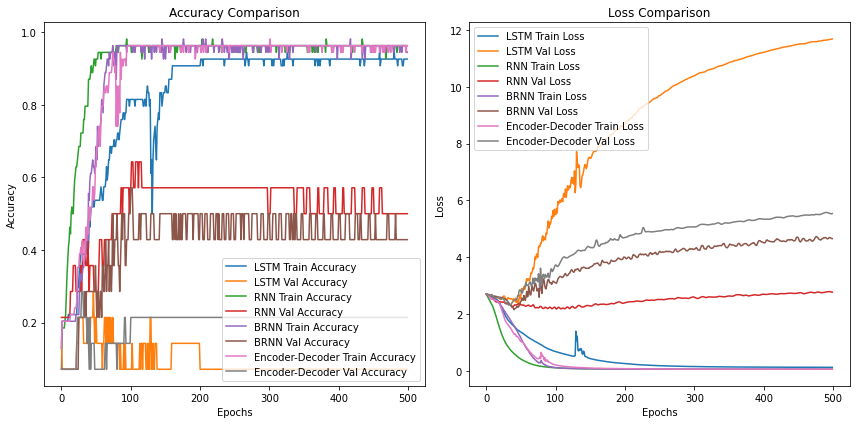

In [33]:
# Plot the accuracy and loss for all models
def plot_metrics(history_dict):
    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    for model_name, history in history_dict.items():
        plt.plot(history.history['accuracy'], label=f'{model_name} Train Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{model_name} Val Accuracy')
    plt.title('Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    for model_name, history in history_dict.items():
        plt.plot(history.history['loss'], label=f'{model_name} Train Loss')
        plt.plot(history.history['val_loss'], label=f'{model_name} Val Loss')
    plt.title('Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the comparison metrics
plot_metrics(history_dict)
